### Predictive modelling with Python

*Jure Žabkar*

*Thu, 25 April 2024*

---

### Importing data
(Help on [csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table) and [excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader))

From **sklearn's internal datasets**, e.g.:

In [1]:
import pandas as pd
iris = pd.read_csv('datasets/Iris.csv')

In [2]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

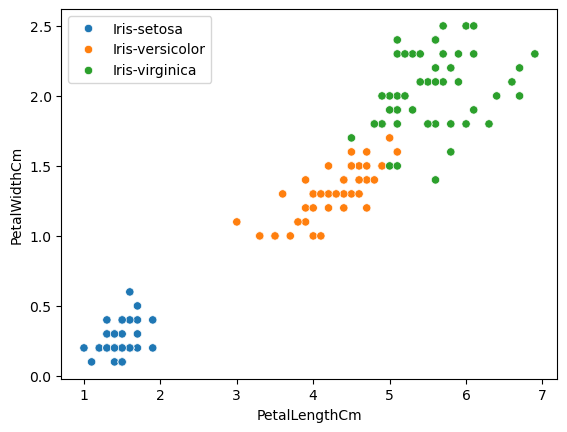

In [7]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',  hue='Species', data=iris, )
plt.legend(loc='upper left')
plt.show()

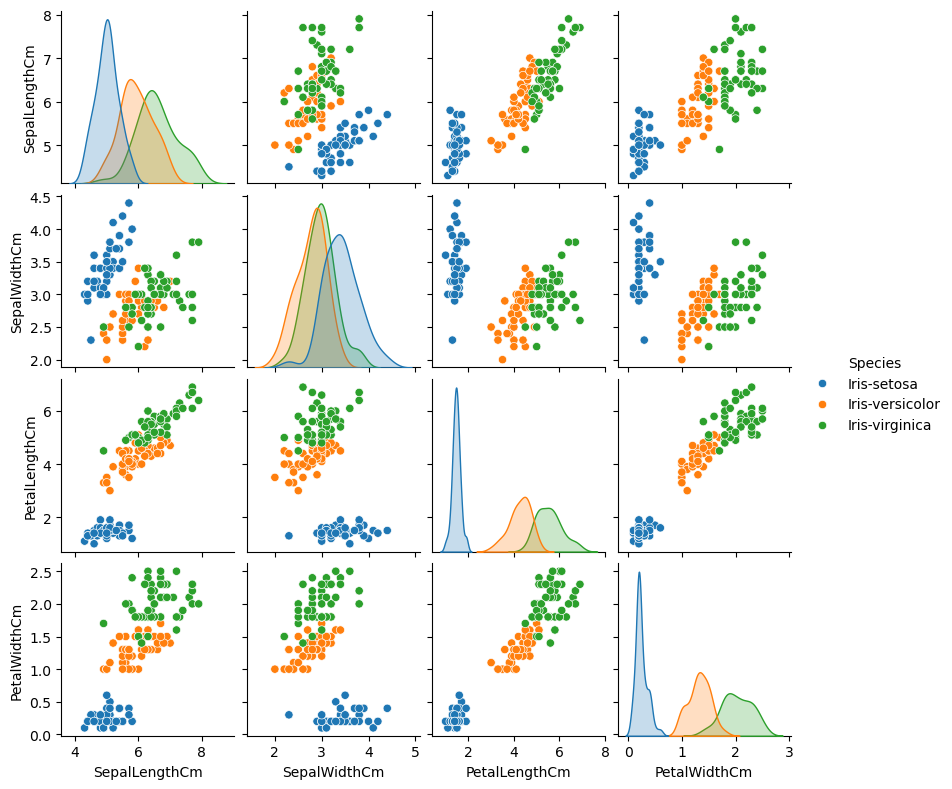

In [8]:
sns.pairplot(iris.drop(['Id'], axis = 1), hue='Species', height=2)

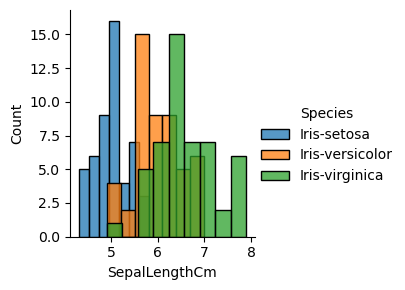

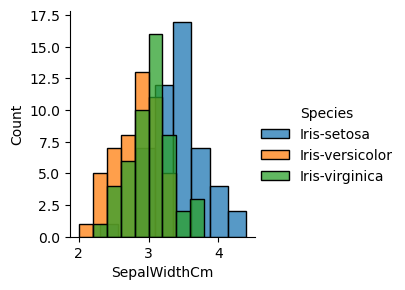

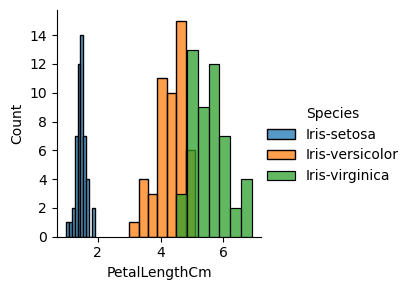

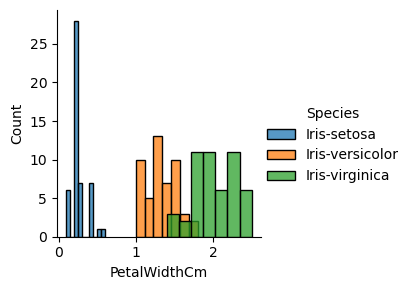

In [9]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalWidthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalWidthCm").add_legend()
  
plt.show()

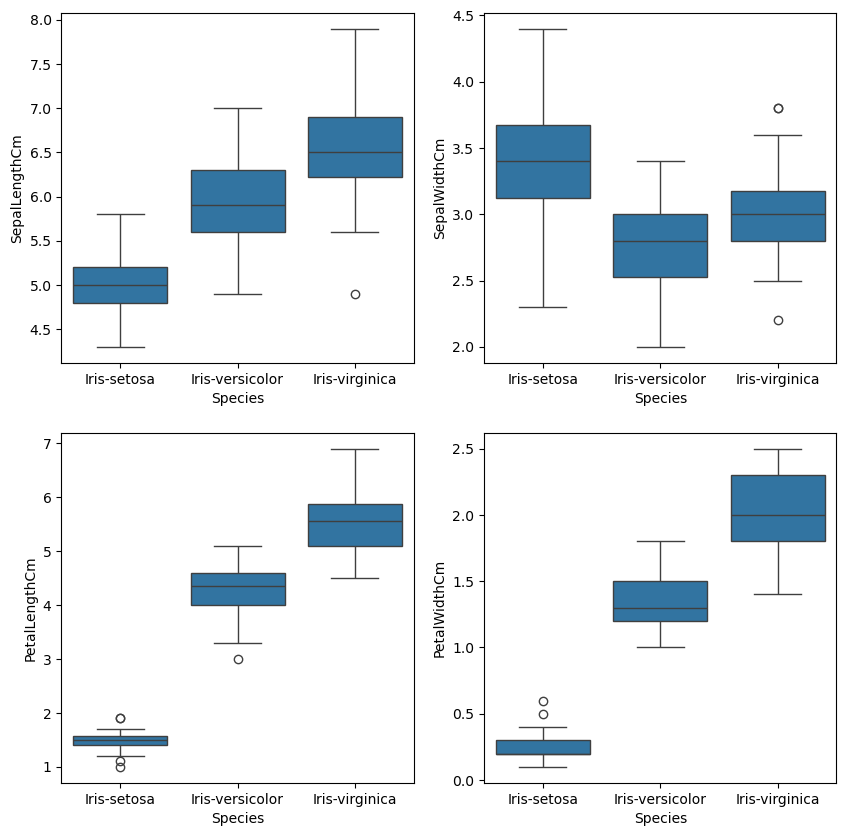

In [10]:
plt.figure(figsize=(10,10))
      
plt.subplot(221)
sns.boxplot(x="Species", y='SepalLengthCm', data=iris)
  
plt.subplot(222)
sns.boxplot(x="Species", y='SepalWidthCm', data=iris)
  
plt.subplot(223)
sns.boxplot(x="Species", y='PetalLengthCm', data=iris)
  
plt.subplot(224)
sns.boxplot(x="Species", y='PetalWidthCm', data=iris)
  
plt.show()

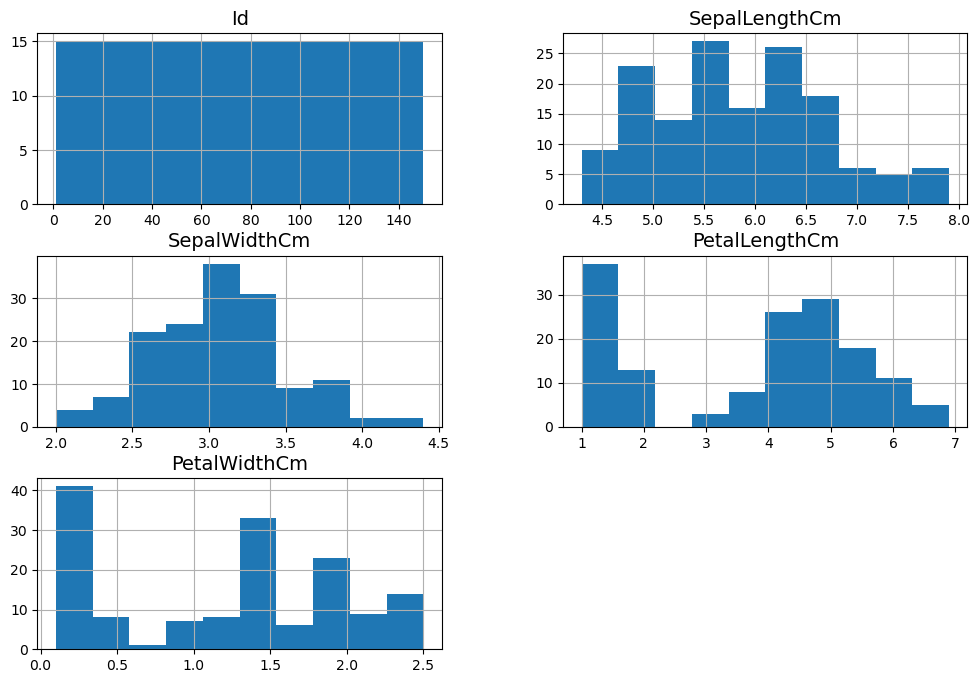

In [14]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

iris.hist(bins=10, figsize=(12, 8))
plt.savefig("iris_attribute_histogram_plots.png", dpi=300)
plt.show()

In [11]:
feature_names = iris.columns[1:-1]
class_names = iris.columns[-1]
X = iris[iris.columns[1:-1]]
y = iris[iris.columns[-1]]
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

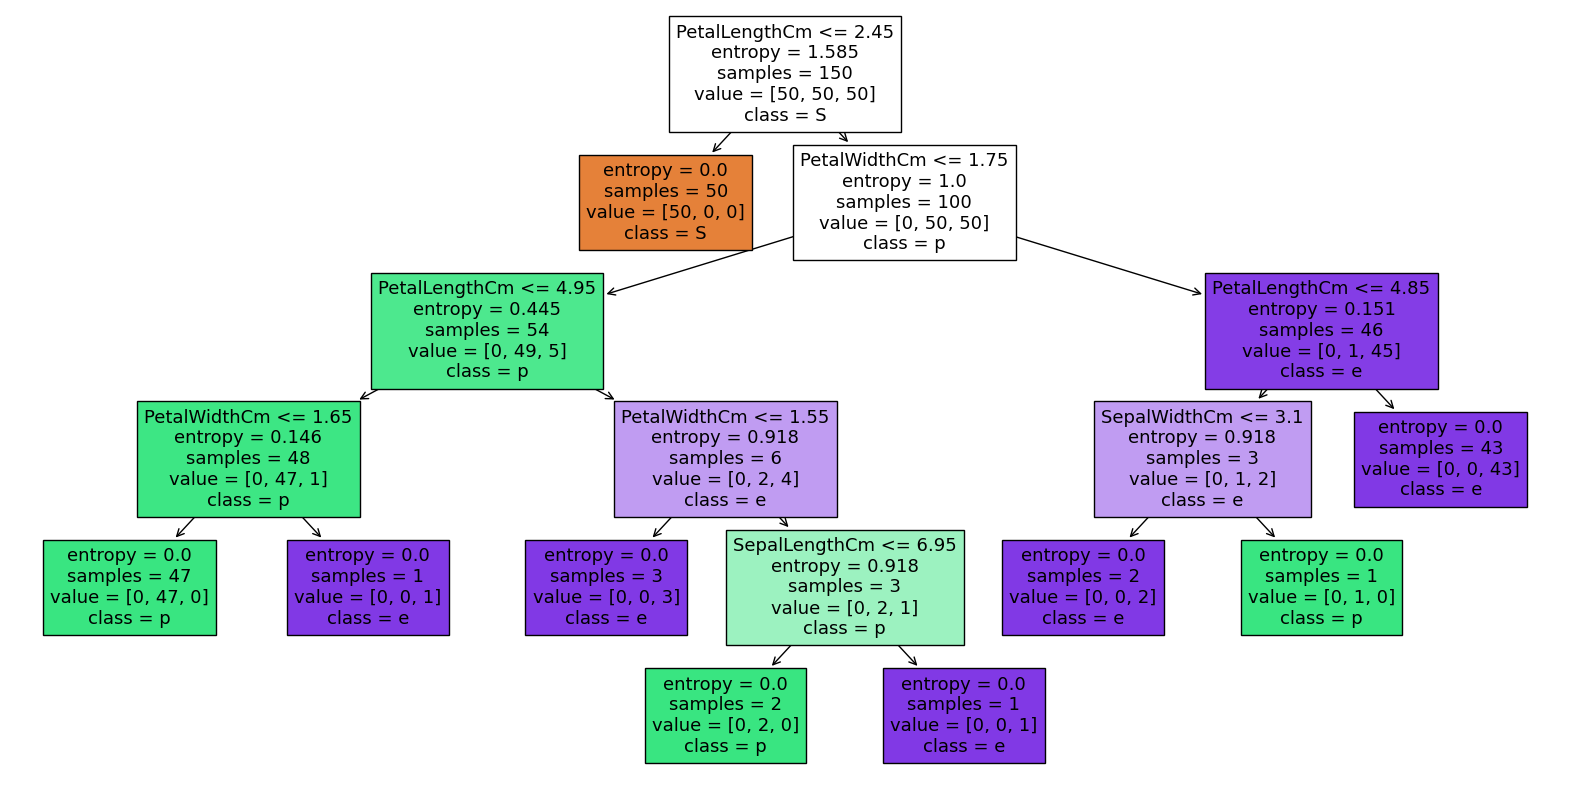

In [12]:
fig = plt.figure(figsize=[20,10])
ax = plt.gca()
tree.plot_tree(clf, filled=True, ax=ax, class_names = class_names, feature_names=feature_names)
plt.show()

In [13]:
fig.savefig("iris_tree.png")